In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import warnings
import time
import pickle as pk
from pickle import dump
from sklearn import preprocessing
from scipy.io import loadmat
warnings.filterwarnings("ignore")

In [0]:
 def clean(array):
  a = []
  for i in range(0, 3200, 2):
    n = int(array[i])
    a.append(n)
  return a

In [0]:
def txtFiles(i,j,name):
  if i <= 9:
    file = open('/content/drive/My Drive/SBJ0'+str(i)+'/SBJ0'+str(i)+'/S0'+str(j)+'/Train/train'+ name +'.txt', 'r') 
  else:
    file = open('/content/drive/My Drive/SBJ'+str(i)+'/SBJ'+str(i)+'/S0'+str(j)+'/Train/train' + name + '.txt', 'r')    
  f = file.read() 
  clean_arr = clean(f)  
  return clean_arr

In [0]:
def statistics(data,numIter):
  mean = []
  std_dev = []
  variance = []
  median = []
  maxs = []
  mins= []
  ranges = []
  stat_matrix = []
  row = []
  for i in range(numIter):
    x=data[i]    
    m = round(stat.mean(x), 4)
    mean.append(m)   
    s = round(stat.stdev(x),4)
    std_dev.append(s)    
    v = round(stat.variance(x), 4)
    variance.append(v)   
    n = round(stat.median(x), 4)
    median.append(n) 
    mx = round(max(x), 4)
    maxs.append(mx)   
    mi = round(min(x), 4)
    mins.append(mi)   
    r = round(max(x)-min(x), 4)   
    row.append(m)
    row.append(s)
    row.append(v)
    row.append(n)
    row.append(mx)
    row.append(mi)
    row.append(r)
  return row

In [0]:
def allData(data): 
  allTables1600 = []
  for graph in range(1600):
    electrode= []
    event = []
    for i in range(8):
        for j in range(350):
            broj=data[i][j][graph]
            electrode.append(broj)        
        elec = [electrode]
        stat_electrode = statistics(elec, 1)
        x = electrode + stat_electrode
        event.append(x)
        electrode = []   
    allTables1600.append(event)
  return allTables1600

In [0]:
start_time = time.time()

data_stat=[] 
targets_stat = []
events_stat = [] 
for i in range(1,16):
  if i <= 9:
    for j in range(1,4):
      d = loadmat('/content/drive/My Drive/SBJ0'+str(i)+'/SBJ0'+str(i)+'/S0'+str(j)+'/Train/trainData.mat')
      d = d['trainData']     
      event = txtFiles(i,j,"Events")
      target = txtFiles(i,j,"Targets")
      x = allData(d)
      data_stat.extend(x)
      targets_stat.extend(target)
      events_stat.extend(event)      
  else:
    for j in range(1,4):
      d = loadmat('/content/drive/My Drive/SBJ'+str(i)+'/SBJ'+str(i)+'/S0'+str(j)+'/Train/trainData.mat')
      d = d['trainData']      
      event = txtFiles(i,j,"Events")
      target = txtFiles(i,j,"Targets")
      x = allData(d)
      data_stat.extend(x)
      targets_stat.extend(target)
      events_stat.extend(event)

print((time.time() - start_time)/60)

47.6742862145106


In [0]:
print(len(data_stat))
print(len(data_stat[0]))
print(len(data_stat[0][0]))
print(len(targets_stat))
print(len(events_stat))
print(data_stat[0][0])

72000
8
357
72000
72000
[8.08706283569336, 6.765045642852783, 4.621908187866211, 2.3666160106658936, 0.5919294953346252, -0.692666232585907, -1.9908103942871094, -3.7803077697753906, -6.0783891677856445, -8.363454818725586, -9.750032424926758, -9.427454948425293, -7.232326984405518, -3.906517505645752, -0.7229940295219421, 1.2644598484039307, 1.693996787071228, 0.8191764950752258, -0.7860270738601685, -2.616122007369995, -4.620538234710693, -7.00520658493042, -9.683342933654785, -12.181407928466797, -13.78616714477539, -13.768915176391602, -11.994710922241211, -9.326236724853516, -7.0896148681640625, -6.091310501098633, -6.19416618347168, -6.673886775970459, -6.86655855178833, -6.681576728820801, -6.633171081542969, -7.361781120300293, -9.143667221069336, -11.707605361938477, -14.390292167663574, -16.518117904663086, -17.718353271484375, -18.042560577392578, -17.85620880126953, -17.451032638549805, -16.712570190429688, -15.25307559967041, -12.774947166442871, -9.210601806640625, -4.893

In [0]:
dump(targets_stat, open('/content/drive/My Drive/targets72k_stat.pkl', 'wb'))
dump(events_stat, open('/content/drive/My Drive/events72k_stat.pkl', 'wb'))

In [0]:
data1 = data_stat[:10000]
dump(data1, open('/content/drive/My Drive/train_data-raw-1-statperelectrode.pkl', 'wb'))

In [0]:
data2 = data_stat[10000:20000]
dump(data2, open('/content/drive/My Drive/train_data-raw-2-statperelectrode.pkl', 'wb'))

In [0]:
data3 = data_stat[20000:30000]
dump(data3, open('/content/drive/My Drive/train_data-raw-3-statperelectrode.pkl', 'wb'))

In [0]:
data4 = data_stat[30000:40000]
dump(data4, open('/content/drive/My Drive/train_data-raw-4-statperelectrode.pkl', 'wb'))

In [0]:
data5 = data_stat[40000:50000]
dump(data5, open('/content/drive/My Drive/train_data-raw-5-statperelectrode.pkl', 'wb'))

In [0]:
data6 = data_stat[50000:60000]
dump(data6, open('/content/drive/My Drive/train_data-raw-6-statperelectrode.pkl', 'wb'))

In [0]:
data7 = data_stat[60000:72000]
dump(data7, open('/content/drive/My Drive/train_data-raw-7-statperelectrode.pkl', 'wb'))

In [0]:
data1 = pk.load(open('/content/drive/My Drive/train_data-raw-1-statperelectrode.pkl', 'rb'))
print('Loaded data %d' % len(data1))
print('Loaded data %d' % len(data1[0]))
print('Loaded data %d' % len(data1[0][0]))

Loaded data 10000
Loaded data 8
Loaded data 357


In [0]:
import matplotlib.pyplot as plt
import keras
from __future__ import print_function
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, AveragePooling2D
%matplotlib inline

Using TensorFlow backend.


In [0]:
images1 = pk.load(open('/content/drive/My Drive/train_data-raw-1-statperelectrode.pkl', 'rb'))
images2 = pk.load(open('/content/drive/My Drive/train_data-raw-2-statperelectrode.pkl', 'rb'))
images3 = pk.load(open('/content/drive/My Drive/train_data-raw-3-statperelectrode.pkl', 'rb'))
images4 = pk.load(open('/content/drive/My Drive/train_data-raw-4-statperelectrode.pkl', 'rb'))
images5 = pk.load(open('/content/drive/My Drive/train_data-raw-5-statperelectrode.pkl', 'rb'))
images6 = pk.load(open('/content/drive/My Drive/train_data-raw-6-statperelectrode.pkl', 'rb'))
images7 = pk.load(open('/content/drive/My Drive/train_data-raw-7-statperelectrode.pkl', 'rb'))

In [0]:
images = images1 + images2 + images3 + images4 + images5 + images6 + images7
images = np.array(images)
print(images.shape)

(72000, 8, 357)


In [0]:
size=int(len(images)*0.75)
print(size)
train_images=images[:size]
test_images=images[size:]
print(train_images.shape)
print(test_images.shape)

54000
(54000, 8, 357)
(18000, 8, 357)


In [0]:
labels=pk.load(open('/content/drive/My Drive/targets72k_stat.pkl', 'rb'))
labels=np.array(labels)
tr_labels=labels[:size]
ts_labels=labels[size:]
train_labels=[]
for i in range(len(tr_labels)):
  x = tr_labels[i]
  x = [x]
  train_labels.append(x)
train_labels=np.array(train_labels)
print(train_labels.shape)
test_labels=[]
for i in range(len(ts_labels)):
  x = ts_labels[i]
  x = [x]
  test_labels.append(x)
test_labels=np.array(test_labels)
print(test_labels.shape)

(54000, 1)
(18000, 1)


In [0]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
classes = np.unique(test_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (54000, 8, 357) (54000, 1)
Testing data shape :  (18000, 8, 357) (18000, 1)
Total number of outputs :  2
Output classes :  [0 1]


In [0]:
nRows,nCols,nDims = (8, 357, 1)

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Original label 0 : ', train_labels[4])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[4])

print('Original label 0 : ', train_labels[3])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[3])

Original label 0 :  [1]
After conversion to categorical ( one-hot ) :  [0. 1.]
Original label 0 :  [0]
After conversion to categorical ( one-hot ) :  [1. 0.]


###<b>МОДЕЛ I</b>

In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(16, (2, 2), padding='same', activation='tanh', input_shape=input_shape))
    model.add(Conv2D(16, (2, 2), activation='tanh'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (2, 2), activation='tanh'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model = createModel()
batch_size = 100
epochs = 100
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 8, 357, 16)        80        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 356, 16)        1040      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 178, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 178, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 177, 32)        2080      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 88, 32)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 88, 32)        

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot))
model.evaluate(test_data, test_labels_one_hot)

Train on 54000 samples, validate on 18000 samples
Epoch 1/100
54000/54000 [==============================] - 17s 317us/step - loss: 0.3650 - accuracy: 0.8738 - val_loss: 0.3715 - val_accuracy: 0.8706
Epoch 2/100
54000/54000 [==============================] - 10s 189us/step - loss: 0.3446 - accuracy: 0.8748 - val_loss: 0.3715 - val_accuracy: 0.8659
Epoch 3/100
54000/54000 [==============================] - 10s 188us/step - loss: 0.3363 - accuracy: 0.8759 - val_loss: 0.3722 - val_accuracy: 0.8639
Epoch 4/100
54000/54000 [==============================] - 10s 190us/step - loss: 0.3296 - accuracy: 0.8784 - val_loss: 0.3863 - val_accuracy: 0.8528
Epoch 5/100
54000/54000 [==============================] - 10s 189us/step - loss: 0.3264 - accuracy: 0.8794 - val_loss: 0.3665 - val_accuracy: 0.8649
Epoch 6/100
54000/54000 [==============================] - 10s 187us/step - loss: 0.3235 - accuracy: 0.8793 - val_loss: 0.3692 - val_accuracy: 0.8635
Epoch 7/100
54000/54000 [=========================

[0.49616344610850016, 0.8604444265365601]

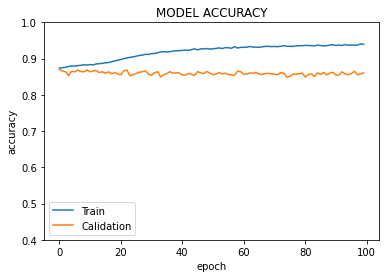

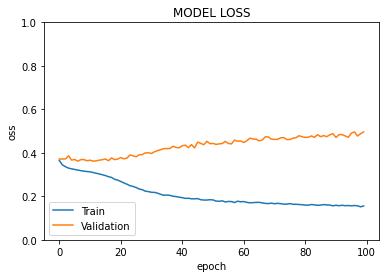

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.4, 1)
plt.legend(['Train', 'Calidation'], loc='lower left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('oss')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

In [0]:
event_labels = pk.load(open('/content/drive/My Drive/events72k_stat.pkl', 'rb'))
event_labels = event_labels[54000:]

In [0]:
targets_in_validation=0
for i in range(len(event_labels)):
  if event_labels[i]==1:
    targets_in_validation=targets_in_validation+1
print(targets_in_validation)

2250


In [0]:
predictions = model.predict(test_data)
num=0
for i in range (len(test_data)):
  if test_labels[i]==1 and np.argmax(predictions[i])==0:
               print("Num: ", i, "Position: ", np.argmax(predictions[i]), " - ", test_labels[i], ":Label ","Probability: ", np.max(predictions[i]), "Event: ", event_labels[i])
               num=num+1
print(num)

Num:  3 Position:  0  -  [1] :Label  Probability:  0.9257818 Event:  3
Num:  8 Position:  0  -  [1] :Label  Probability:  0.9567519 Event:  3
Num:  39 Position:  0  -  [1] :Label  Probability:  0.73830056 Event:  3
Num:  45 Position:  0  -  [1] :Label  Probability:  0.9190179 Event:  3
Num:  52 Position:  0  -  [1] :Label  Probability:  0.71861625 Event:  3
Num:  60 Position:  0  -  [1] :Label  Probability:  0.9723086 Event:  3
Num:  66 Position:  0  -  [1] :Label  Probability:  0.99307466 Event:  3
Num:  74 Position:  0  -  [1] :Label  Probability:  0.9562506 Event:  3
Num:  81 Position:  0  -  [1] :Label  Probability:  0.9905962 Event:  5
Num:  92 Position:  0  -  [1] :Label  Probability:  0.9940101 Event:  5
Num:  100 Position:  0  -  [1] :Label  Probability:  0.9928611 Event:  5
Num:  109 Position:  0  -  [1] :Label  Probability:  0.985422 Event:  5
Num:  117 Position:  0  -  [1] :Label  Probability:  0.99585116 Event:  5
Num:  122 Position:  0  -  [1] :Label  Probability:  0.99773

###<b>МОДЕЛ II</b>

In [0]:
targets=[]
non_targets_pr=[]
non_targets=[]

for i in range(len(images)):
  if labels[i]==0:
    non_targets_pr.append(images[i])
  else:
    targets.append(images[i])
print(len(non_targets_pr))
print(len(targets))

for i in range(0,63000,7):
  non_targets.append(non_targets_pr[i])
print(len(non_targets))

final_data=[]
final_targets=[]

for i in range(len(targets)):
  final_data.append(targets[i])
  final_data.append(non_targets[i])
  final_targets.append(1)
  final_targets.append(0)

final_data=np.array(final_data)
final_targets=np.array(final_targets)

print(len(final_data))

63000
9000
9000
18000
18000
[1 0 1 ... 0 1 0]


In [0]:
size=int(len(final_data)*0.75)
print(size)
train_images=final_data[:size]
test_images=final_data[size:]
print(train_images.shape)
print(test_images.shape)

13500
(13500, 8, 357)
(4500, 8, 357)


In [0]:
labels=final_targets
labels=np.array(labels)
tr_labels=labels[:size]
ts_labels=labels[size:]
train_labels=[]
for i in range(len(tr_labels)):
  x = tr_labels[i]
  x = [x]
  train_labels.append(x)
train_labels=np.array(train_labels)
print(train_labels.shape)
test_labels=[]
for i in range(len(ts_labels)):
  x = ts_labels[i]
  x = [x]
  test_labels.append(x)
test_labels=np.array(test_labels)
print(test_labels.shape)

(13500, 1)
(4500, 1)


In [0]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
classes = np.unique(test_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Training data shape :  (13500, 8, 357) (13500, 1)
Testing data shape :  (4500, 8, 357) (4500, 1)
Total number of outputs :  2
Output classes :  [0 1]


In [0]:
nRows,nCols,nDims = (8, 357, 1)

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Original label 0 : ', train_labels[4])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[4])

print('Original label 0 : ', train_labels[3])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[3])

Original label 0 :  [1]
After conversion to categorical ( one-hot ) :  [0. 1.]
Original label 0 :  [0]
After conversion to categorical ( one-hot ) :  [1. 0.]


In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (2, 2), padding='same', activation='tanh', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (2, 2), activation='tanh'))
    model.add(Conv2D(32, (2, 2), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model = createModel()
batch_size = 80
epochs = 60
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 8, 357, 32)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 178, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 4, 178, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 177, 32)        4128      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 2, 176, 32)        4128      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 88, 32)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 88, 32)       

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot))
model.evaluate(test_data, test_labels_one_hot)

Train on 13500 samples, validate on 4500 samples
Epoch 1/60
13500/13500 [==============================] - 3s 229us/step - loss: 0.6683 - accuracy: 0.6014 - val_loss: 0.6851 - val_accuracy: 0.5898
Epoch 2/60
13500/13500 [==============================] - 3s 200us/step - loss: 0.6381 - accuracy: 0.6498 - val_loss: 0.6839 - val_accuracy: 0.5956
Epoch 3/60
13500/13500 [==============================] - 3s 200us/step - loss: 0.6265 - accuracy: 0.6647 - val_loss: 0.7037 - val_accuracy: 0.5876
Epoch 4/60
13500/13500 [==============================] - 3s 200us/step - loss: 0.6204 - accuracy: 0.6666 - val_loss: 0.6844 - val_accuracy: 0.6067
Epoch 5/60
13500/13500 [==============================] - 3s 199us/step - loss: 0.6120 - accuracy: 0.6762 - val_loss: 0.6985 - val_accuracy: 0.5898
Epoch 6/60
13500/13500 [==============================] - 3s 200us/step - loss: 0.6043 - accuracy: 0.6821 - val_loss: 0.6895 - val_accuracy: 0.5918
Epoch 7/60
13500/13500 [==============================] - 3s 20

[0.8176833477020263, 0.604888916015625]

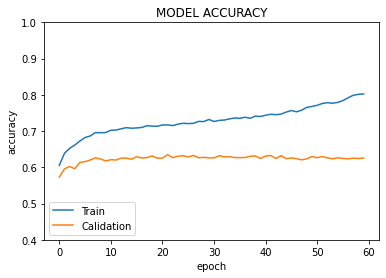

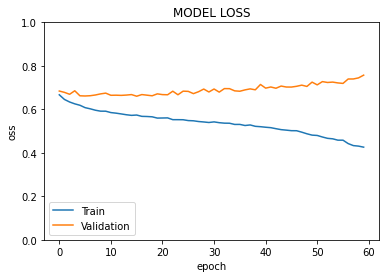

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.4, 1)
plt.legend(['Train', 'Calidation'], loc='lower left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('oss')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

###<b>МОДЕЛ - ФИНАЛЕН</b>

In [0]:
class_weights = {0:1, 1:7}

In [0]:
size=int(len(images)*0.75)
print(size)
train_images=images[:size]
test_images=images[size:]
print(train_images.shape)
print(test_images.shape)

54000
(54000, 8, 357)
(18000, 8, 357)


In [0]:
labels=pk.load(open('/content/drive/My Drive/targets72k_stat.pkl', 'rb'))
labels=np.array(labels)
tr_labels=labels[:size]
ts_labels=labels[size:]
train_labels=[]
for i in range(len(tr_labels)):
  x = tr_labels[i]
  x = [x]
  train_labels.append(x)
train_labels=np.array(train_labels)
print(train_labels.shape)
test_labels=[]
for i in range(len(ts_labels)):
  x = ts_labels[i]
  x = [x]
  test_labels.append(x)
test_labels=np.array(test_labels)
print(test_labels.shape)

(54000, 1)
(18000, 1)


In [0]:
nRows,nCols,nDims = (8, 357, 1)

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Original label 0 : ', train_labels[4])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[4])

print('Original label 0 : ', train_labels[3])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[3])

Original label 0 :  [1]
After conversion to categorical ( one-hot ) :  [0. 1.]
Original label 0 :  [0]
After conversion to categorical ( one-hot ) :  [1. 0.]


In [0]:
def createModel():
    model = Sequential()
    model.add(Conv2D(16, (2, 2), padding='same', activation='tanh', input_shape=input_shape))
    model.add(Conv2D(16, (2, 2), activation='tanh'))
    model.add(Conv2D(16, (2, 2), activation='tanh'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))    
    model.add(Conv2D(32, (2, 2), padding='same', activation='tanh', input_shape=input_shape))
    model.add(Conv2D(32, (2, 2), activation='tanh'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(100, activation='tanh'))
    model.add(Dropout(0.25))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [0]:
model = createModel()
batch_size = 200
epochs = 60
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 8, 357, 16)        80        
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 7, 356, 16)        1040      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 6, 355, 16)        1040      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 177, 16)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 3, 177, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 3, 177, 32)        2080      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 2, 176, 32)      

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot), class_weight=class_weights)
model.evaluate(test_data, test_labels_one_hot)

Train on 54000 samples, validate on 18000 samples
Epoch 1/60
54000/54000 [==============================] - 13s 236us/step - loss: 1.1038 - accuracy: 0.6503 - val_loss: 0.6449 - val_accuracy: 0.6547
Epoch 2/60
54000/54000 [==============================] - 12s 227us/step - loss: 1.0123 - accuracy: 0.7031 - val_loss: 0.7209 - val_accuracy: 0.6011
Epoch 3/60
54000/54000 [==============================] - 12s 227us/step - loss: 0.9943 - accuracy: 0.7122 - val_loss: 0.6367 - val_accuracy: 0.6485
Epoch 4/60
54000/54000 [==============================] - 12s 227us/step - loss: 0.9751 - accuracy: 0.7183 - val_loss: 0.6586 - val_accuracy: 0.6349
Epoch 5/60
54000/54000 [==============================] - 12s 226us/step - loss: 0.9663 - accuracy: 0.7203 - val_loss: 0.6891 - val_accuracy: 0.6207
Epoch 6/60
54000/54000 [==============================] - 12s 226us/step - loss: 0.9536 - accuracy: 0.7273 - val_loss: 0.6528 - val_accuracy: 0.6389
Epoch 7/60
54000/54000 [==============================] 

[0.5794790781603919, 0.7698333263397217]

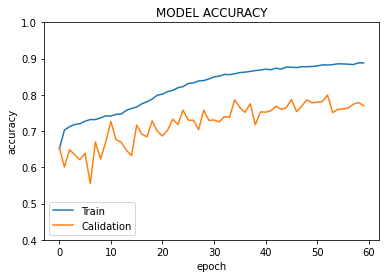

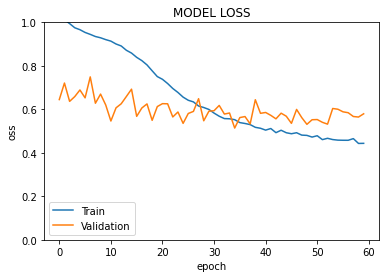

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.4, 1)
plt.legend(['Train', 'Calidation'], loc='lower left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('oss')
plt.xlabel('epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Validation'], loc='lower left')
plt.show()

In [0]:
event_labels = pk.load(open('/content/drive/My Drive/events72k_stat.pkl', 'rb'))
event_labels = event_labels[54000:]
print(len(event_labels))

18000


In [0]:
targets_in_validation=0
for i in range(len(event_labels)):
  if event_labels[i]==1:
    targets_in_validation=targets_in_validation+1
print(targets_in_validation)

2250


In [0]:
predictions = model.predict(test_data)
num=0
for i in range (len(event_labels)):
  if test_labels[i]==1 and np.argmax(predictions[i])==0:
               print("Num: ", i, "Position: ", np.argmax(predictions[i]), " - ", test_labels[i], ":Label ","Probability: ", np.max(predictions[i]), "Event: ", event_labels[i])
               num=num+1
print(num)

Num:  39 Position:  0  -  [1] :Label  Probability:  0.62604725 Event:  3
Num:  52 Position:  0  -  [1] :Label  Probability:  0.70435494 Event:  3
Num:  60 Position:  0  -  [1] :Label  Probability:  0.82544094 Event:  3
Num:  66 Position:  0  -  [1] :Label  Probability:  0.94376075 Event:  3
Num:  74 Position:  0  -  [1] :Label  Probability:  0.8313986 Event:  3
Num:  81 Position:  0  -  [1] :Label  Probability:  0.9876288 Event:  5
Num:  92 Position:  0  -  [1] :Label  Probability:  0.9970452 Event:  5
Num:  100 Position:  0  -  [1] :Label  Probability:  0.96005017 Event:  5
Num:  109 Position:  0  -  [1] :Label  Probability:  0.96908534 Event:  5
Num:  117 Position:  0  -  [1] :Label  Probability:  0.80808794 Event:  5
Num:  130 Position:  0  -  [1] :Label  Probability:  0.55632794 Event:  5
Num:  142 Position:  0  -  [1] :Label  Probability:  0.7342877 Event:  5
Num:  150 Position:  0  -  [1] :Label  Probability:  0.98487943 Event:  5
Num:  153 Position:  0  -  [1] :Label  Probabilit

In [0]:
model.save('/content/drive/My Drive/Trained_Model-Phase3-Final')

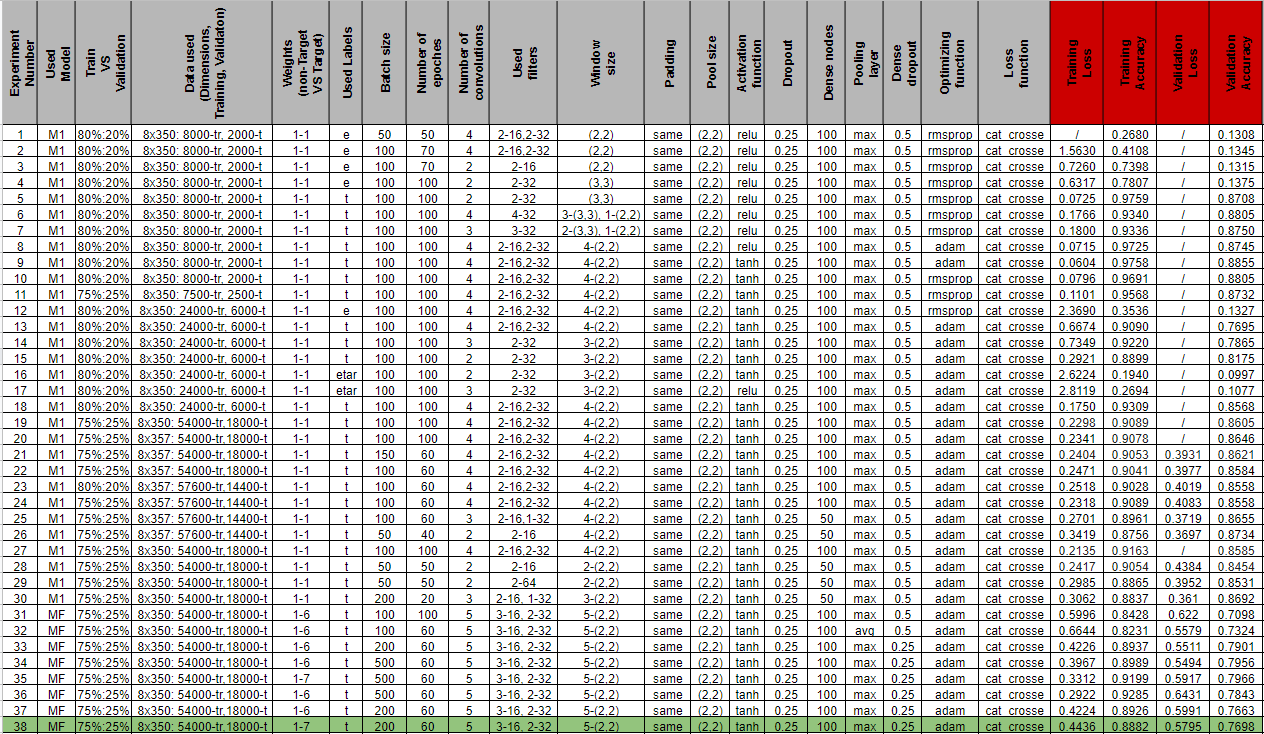

## **III. РЕФЕРЕНЦИ**
Во прилог следуваат линкови за научни трудови, написи, туторијали, списанија и форуми кои се користеја како референци за изработката на третата фаза од проектот.

[1] Training & evaluation with the built-in methods <br>
Available:https://keras.io/guides/training_with_built_in_methods/?fbclid=IwAR0tALRpci8D-gV4m2X-DOLgDEko-PlN1wk9Ut0jjDJy8fVEONeSwfUoV_Q 
<br>
<br>
[2] Deep learning for electroencephalogram (EEG) classification tasks: a review <br>
Available: https://iopscience.iop.org/article/10.1088/1741-2552/ab0ab5?fbclid=IwAR25vDlenDMYHInZiw3w2BmzD4dA3-f3c_g0DpJysPewlEqCOfdDNsE6234
<br>
<br>
[3] Tutorial: Optimizing Neural Networks using Keras (with Image recognition case study) <br>
Available: https://www.analyticsvidhya.com/blog/2016/10/tutorial-optimizing-neural-networks-using-keras-with-image-recognition-case-study/?fbclid=IwAR3yP6E7TWDXcdd9u0p86GsxQZZQlALFqx6vKn2DTm_EPEphWZyB6J70xjA
<br>
<br>
[4] Convolutional Neural Network <br>
Available: https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
<br>
<br>
[5] A Deep Transfer Convolutional Neural Network Framework for EEG Signal Classification <br>
Available: https://ieeexplore.ieee.org/document/8772136?fbclid=IwAR3d34ZpP309GcORPOVIH4hIIix9YeAg_9QcQz8-rr8S7pOtWK02hlv7FdQ
<br>
<br>
[6] A Comprehensive Tutorial to learn Convolutional Neural Networks <br>
Available: https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/?fbclid=IwAR1mPFupvp6pmnjrwF7SMtTHMoHxNnZYjqmIuEzExu0-sC-ORMlvebcg8u4
<br>
<br>
[7] Convolutional Neural Network (CNN) <br>
Available: https://www.tensorflow.org/tutorials/images/cnn?fbclid=IwAR0gzl-TY-a95Y4-WJBxeQsQaBOAeli5O2aJTTm_qVAhlNnznpQiuDAh6f4
<br>
<br>
[8] Display Deep Learning Model Training History in Keras <br>
Available: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/?fbclid=IwAR0vdfl6MTTjLFEOPHUOiKYNSgjCZhfYgd3AXyWaqK50AaNNxjP2fixmF4s
<br>
<br>
[9] 8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset <br>
Available: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/?fbclid=IwAR1l8hwe6nYTlVtm6HNsNCBQLLdPGZSwzbZUIVStwBUuwgaL1Ucpe9oDtAs
<br>
<br>
